In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
dataset_url='https://www.kaggle.com/datasets/alxmamaev/flowers-recognition'

In [ ]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nivedrajesh0@gmail.com
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition


100%|██████████| 225M/225M [00:06<00:00, 34.9MB/s]


In [ ]:
import os

In [ ]:
data_dir='./flowers-recognition/flowers'

In [ ]:
os.listdir(data_dir)

['tulip', 'dandelion', 'sunflower', 'daisy', 'rose']

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,RandomFlip,RandomRotation,RandomZoom,Flatten


In [ ]:
dirs = os.listdir(data_dir)
print(dirs)

['tulip', 'dandelion', 'sunflower', 'daisy', 'rose']


In [ ]:
for dir in dirs:
  files = list(os.listdir("flowers-recognition/flowers/"+dir))
  print(dir + ' Folder has ' + str(len(files)) + ' images')

tulip Folder has 984 images
dandelion Folder has 1052 images
sunflower Folder has 733 images
daisy Folder has 764 images
rose Folder has 784 images


In [ ]:
base_dir = 'flowers-recognition/flowers'
img_size = 180
batch = 32

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(base_dir,seed=123,validation_split=0.2,subset='training',batch_size=batch,image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory(base_dir,seed=123,validation_split=0.2,subset='validation',batch_size=batch,image_size=(img_size,img_size))

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [ ]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
import matplotlib.pyplot as plt

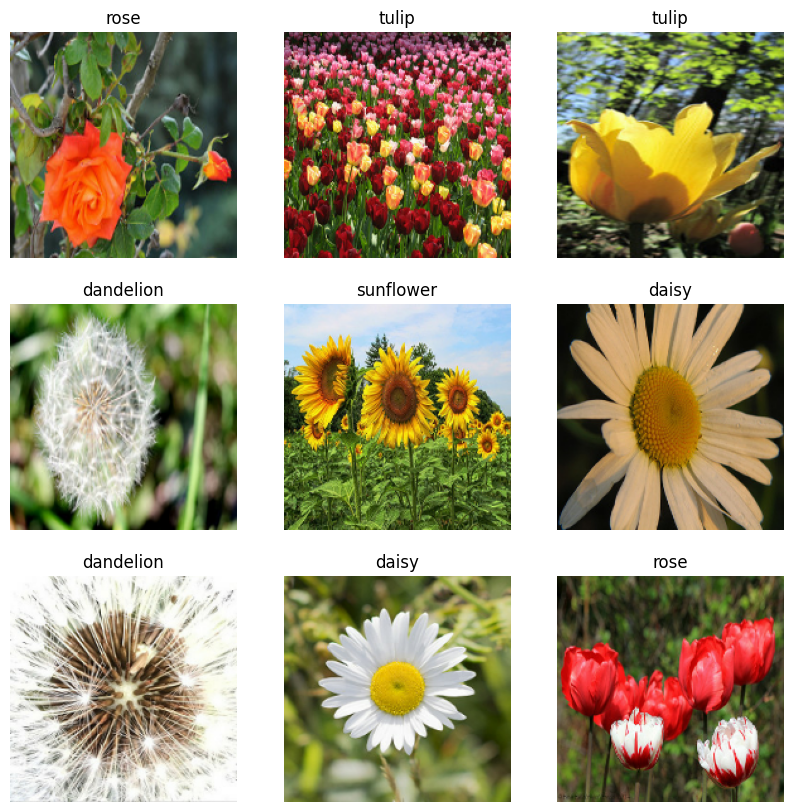

In [ ]:
plt.figure(figsize=(10,10))

for image,labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(flower_names[labels[i]])
        plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:

data_augmentation = Sequential([
    RandomFlip("horizontal", input_shape=(img_size, img_size, 3)),
    RandomRotation(0.1),
    RandomZoom(0.1)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


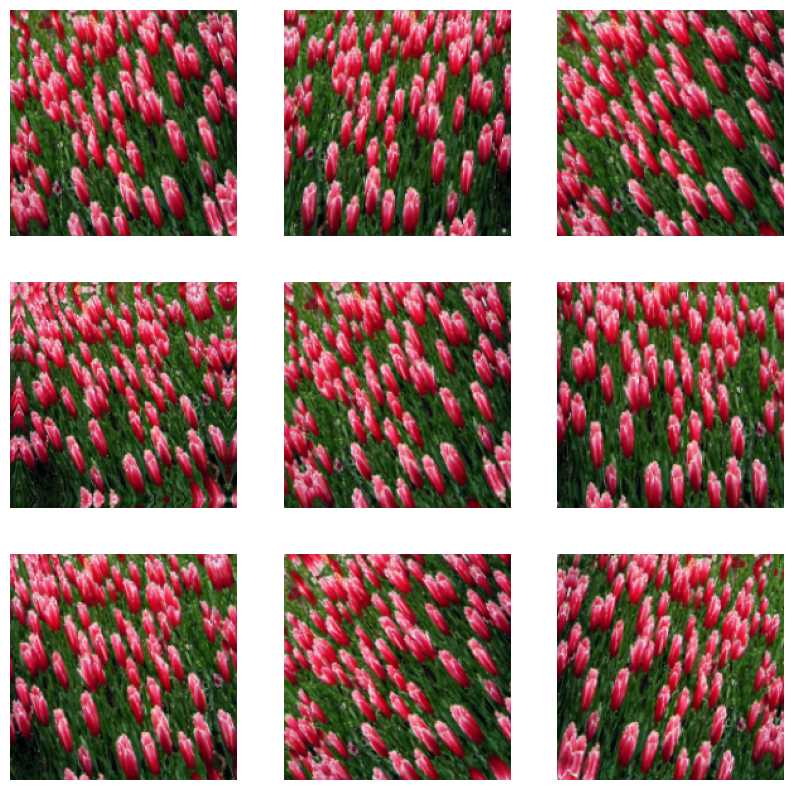

In [ ]:
plt.figure(figsize=(10,10))

for image,labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(image)
        plt.subplot(3,3,i+1)
        plt.imshow(images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(32,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(64,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(512,activation='relu'),
    Dense(5)
])

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,057,253 (15.48 MB)

 Trainable params: 4,057,253 (15.48 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_ds,epochs=15,validation_data = val_ds)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.3483 - loss: 1.4546 - val_accuracy: 0.5017 - val_loss: 1.1158
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.5529 - loss: 1.1053 - val_accuracy: 0.6211 - val_loss: 1.0065
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.6250 - loss: 0.9519 - val_accuracy: 0.6222 - val_loss: 0.9985
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6645 - loss: 0.8779 - val_accuracy: 0.6338 - val_loss: 0.9267
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6551 - loss: 0.8661 - val_accuracy: 0.6570 - val_loss: 0.8986
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.6811 - loss: 0.8393 - val_accuracy: 0.6779 - val_loss: 0.8265
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7129 - loss: 0.7538 - val_accuracy: 0.6918 - val_loss: 0.7948
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7243 - loss: 0.7343 - val_acc

In [ ]:
def img_prediction(path):
  input_image = tf.keras.utils.load_img(path,target_size=(180,180))
  input_image_array = tf.keras.utils.img_to_array(input_image)
  input_image_exp_dim = tf.expand_dims(input_image_array,0)
  prediction = model.predict(input_image_exp_dim)
  result = tf.nn.softmax(prediction[0])

  return flower_names[np.argmax(result)], str(np.max(result*100))


In [ ]:
img_prediction("/content/flowers-recognition/flowers/sunflower/1008566138_6927679c8a.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


('sunflower', '67.33618')

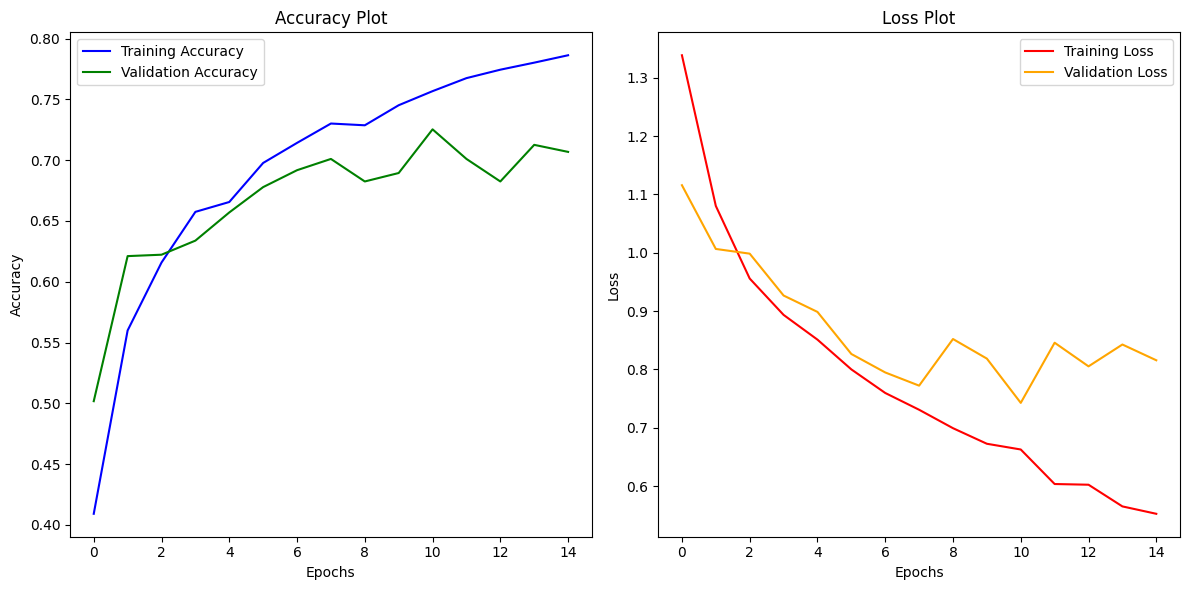

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='b')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='g')
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='r')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.applications import ResNet50

In [ ]:

resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(180, 180, 3))


resnet_base.trainable = False

model = tf.keras.Sequential([
    resnet_base,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)


Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 31s 181ms/step - accuracy: 0.5799 - loss: 8.4902 - val_accuracy: 0.7856 - val_loss: 0.7340
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 25s 72ms/step - accuracy: 0.8911 - loss: 0.3119 - val_accuracy: 0.8076 - val_loss: 0.7438
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.9667 - loss: 0.1093 - val_accuracy: 0.8227 - val_loss: 0.7946
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.9851 - loss: 0.0500 - val_accuracy: 0.8297 - val_loss: 0.7725
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.9919 - loss: 0.0258 - val_accuracy: 0.8482 - val_loss: 0.7807
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.9951 - loss: 0.0142 - val_accuracy: 0.8494 - val_loss: 0.7892
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.9964 - loss: 0.0173 - val_accuracy: 0.8598 - val_loss: 0.8414
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.9978 - loss: 0.0086 - va

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

val_images, val_labels = [], []
for images, labels in val_ds.unbatch():
    val_images.append(images.numpy())
    val_labels.append(labels.numpy())

val_images = np.array(val_images)
val_labels = np.array(val_labels)

predictions = model.predict(val_images)

predicted_classes = np.argmax(predictions, axis=1)


27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 215ms/step


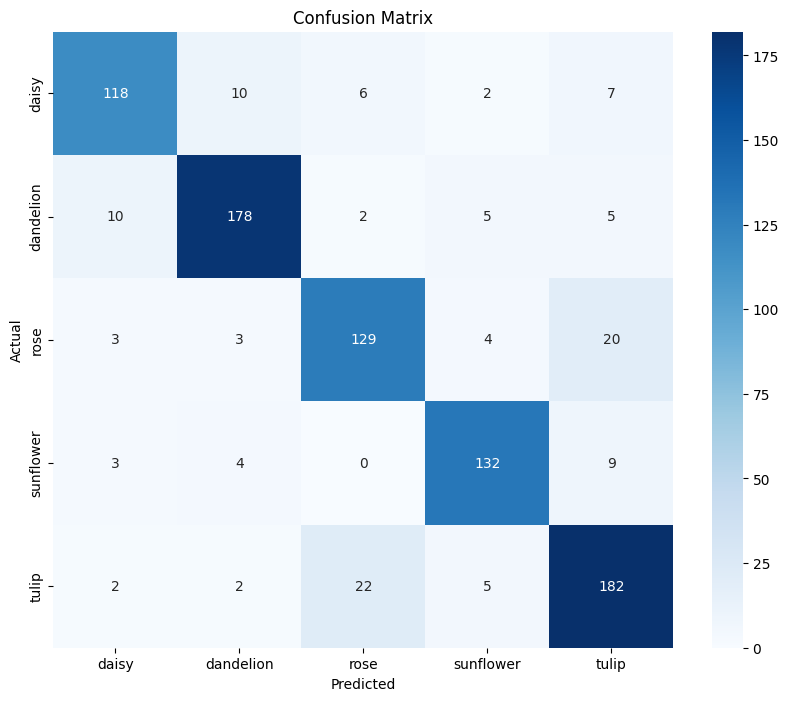

In [ ]:

cm = confusion_matrix(val_labels, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=flower_names, yticklabels=flower_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


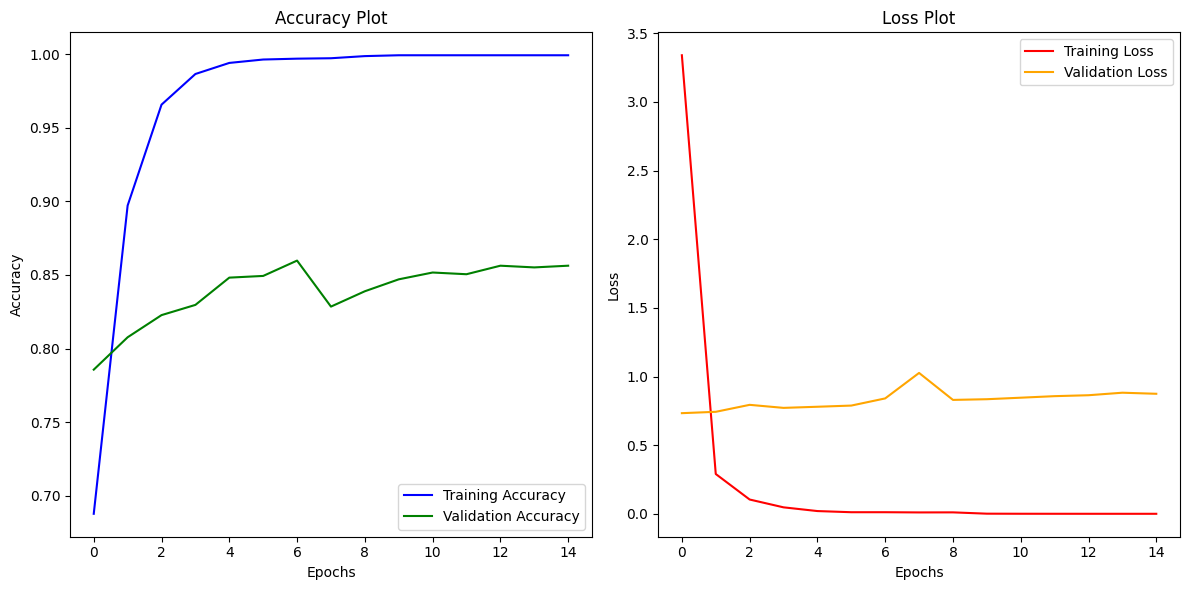

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='b')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='g')
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='r')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(val_labels, predicted_classes, target_names=flower_names))

              precision    recall  f1-score   support

       daisy       0.87      0.83      0.85       143
   dandelion       0.90      0.89      0.90       200
        rose       0.81      0.81      0.81       159
   sunflower       0.89      0.89      0.89       148
       tulip       0.82      0.85      0.83       213

    accuracy                           0.86       863
   macro avg       0.86      0.85      0.86       863
weighted avg       0.86      0.86      0.86       863



In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 28s 157ms/step - accuracy: 0.6026 - loss: 1.1646 - val_accuracy: 0.8331 - val_loss: 0.4793
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.8266 - loss: 0.4811 - val_accuracy: 0.8273 - val_loss: 0.4489
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.8606 - loss: 0.3928 - val_accuracy: 0.8586 - val_loss: 0.4072
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.8638 - loss: 0.3786 - val_accuracy: 0.8621 - val_loss: 0.3890
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.8856 - loss: 0.3138 - val_accuracy: 0.8656 - val_loss: 0.3893
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.9004 - loss: 0.2801 - val_accuracy: 0.8494 - val_loss: 0.4248
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.9004 - loss: 0.2874 - val_accuracy: 0.8470 - val_loss: 0.4158
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.8991 - loss: 0.2685 - val_a